In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import random
from pprint import pprint

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [91]:
df = pd.read_csv('../data/train_bikes.csv', parse_dates=['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [92]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [93]:
train_df = df.iloc[:6532, :].copy()
val_df = df.iloc[6532:8709, :].copy()
test_df = df.iloc[8709:, :].copy()

In [94]:
for X in [train_df, val_df, test_df]:
    X.sort_values(by='datetime', inplace=True)

    X['day_of_year'] = X.datetime.dt.dayofyear
    X['day_of_month'] = X.datetime.dt.day

    X['quarter'] = X.datetime.dt.quarter
    X['week'] = X.datetime.dt.isocalendar().week # use isocalendar().year / week / day

    X['time_of_day'] = pd.cut(X['datetime'].dt.hour, bins=[0,6,9,15,19,24], labels=['early_morning', 'morning_rush', 'midday', 'evening_rush', 'night'], right=False, include_lowest=True)

    X['is_month_end'] = X.datetime.dt.is_month_end
    X['is_month_start'] = X.datetime.dt.is_month_start

    X['is_quarter_end'] = X.datetime.dt.is_quarter_end
    X['is_quarter_start'] = X.datetime.dt.is_quarter_start

    X['is_year_end'] = X.datetime.dt.is_year_end
    X['is_year_start'] = X.datetime.dt.is_year_start

    X['target'] = X['count']
    X['date'] = X.datetime.dt.date

    X.set_index('date', inplace=True)
    X.drop(['count','datetime'], axis=1, inplace=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6532 entries, 2011-01-01 to 2012-03-09
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   season            6532 non-null   int64   
 1   holiday           6532 non-null   int64   
 2   workingday        6532 non-null   int64   
 3   weather           6532 non-null   int64   
 4   temp              6532 non-null   float64 
 5   atemp             6532 non-null   float64 
 6   humidity          6532 non-null   int64   
 7   windspeed         6532 non-null   float64 
 8   casual            6532 non-null   int64   
 9   registered        6532 non-null   int64   
 10  day_of_year       6532 non-null   int64   
 11  day_of_month      6532 non-null   int64   
 12  quarter           6532 non-null   int64   
 13  week              6532 non-null   UInt32  
 14  time_of_day       6532 non-null   category
 15  is_month_end      6532 non-null   bool    
 16  is_month_start

In [95]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,day_of_year,day_of_month,quarter,week,time_of_day,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start,target
date,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,1,1,1,52,early_morning,False,True,False,True,False,True,16
2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,1,1,1,52,early_morning,False,True,False,True,False,True,40
2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,1,1,1,52,early_morning,False,True,False,True,False,True,32
2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,1,1,1,52,early_morning,False,True,False,True,False,True,13
2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,52,early_morning,False,True,False,True,False,True,1


---
## Helper Functions

### Check Purity

In [96]:
def check_purity(data):

    if isinstance(data, pd.DataFrame):
        data = data.values

    target_col = data[:,-1]
    unique_classes = np.unique(target_col)
    
    if len(unique_classes) == 1:
        return True
    else:
        return False

### Classify

In [97]:
def create_leaf(data, ml_task):

    target_col = data[:,-1]

    # Regression
    if ml_task == 'regression':
        leaf = np.mean(target_col)

    # Classification
    else:
        unique_classes, class_counts = np.unique(target_col, return_counts=True)
        idx = class_counts.argmax()
        leaf = unique_classes[idx]

    return leaf

### Potential Splits

In [98]:
def get_potential_splts(data):
    
    if isinstance(data, pd.DataFrame):
        data = data.values
        
    potential_splits = {}
    n_cols = data.shape[1]

    for col_idx in range(n_cols -1):
        
        potential_splits[col_idx] = []
        vals = data[:, col_idx]
        unique_vals = np.unique(vals)

        potential_splits[col_idx] = unique_vals

    return potential_splits

### Split data

In [99]:
def split_data(data, split_col, split_val):

    if isinstance(data, pd.DataFrame):
        data = data.values

    split_col_vals = data[:, split_col]

    feature_type = FEATURE_TYPES[split_col]
    
    # Continuous features
    if feature_type == 'continuous':
        data_below = data[split_col_vals <= split_val]
        data_above = data[split_col_vals > split_val]
    # Categorical features
    else:
        data_below = data[split_col_vals == split_val]
        data_above = data[split_col_vals != split_val]

    return data_below, data_above

### Determine best splits

In [100]:
def calculate_mse(data):

    if isinstance(data, pd.DataFrame):
        data = data.values
    
    actual_vals = data[:, -1]

    # Check for edge case where data is empty
    if len(actual_vals) == 0:
        mse = 0
        
    else:
        preds = np.mean(actual_vals)
        mse = np.mean((actual_vals - preds) **2)

    return mse

In [101]:
def calculate_entropy(data):

    if isinstance(data, pd.DataFrame):
        data = data.values

    target_col = data[:,-1]
    counts = np.unique(target_col, return_counts=True)[1]

    probabilities = counts/counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

In [102]:
def calculate_overall_metric(data_below, data_above, metric_function):

    n_data = len(data_below) + len(data_above)
    
    p_data_below = len(data_below) / n_data
    p_data_above = len(data_above) / n_data

    overall_metric = (p_data_below * metric_function(data_below) +
                       p_data_above * metric_function(data_above))
    
    return overall_metric

In [103]:
def determine_best_split(data, potential_splits, ml_task):

    if isinstance(data, pd.DataFrame):
        data = data.values

    first_iteration = True

    for col_idx in potential_splits:

        for val in potential_splits[col_idx]:
            
            data_below, data_above = split_data(data, split_col=col_idx, split_val=val)

            # Regression
            if ml_task == 'regression':
                current_overall_metric = calculate_overall_metric(data_below, data_above, metric_function=calculate_mse)

            # Classification
            else:
                current_overall_metric = calculate_overall_metric(data_below, data_above, metric_function=calculate_entropy)


            if first_iteration or current_overall_metric <= best_overall_metric:
                first_iteration = False

                best_overall_metric = current_overall_metric
                best_split_col = col_idx
                best_split_val = val

    return best_split_col, best_split_val

In [104]:
def get_feature_type(df):

    feature_types = []
    threshold = 15

    for col in df.columns:
        unique_vals = df[col].unique()
        example_val = unique_vals[0]
        if isinstance(example_val, str) or (len(unique_vals) <= threshold):
            feature_types.append('categorical')
        else:
            feature_types.append('continuous')

    return feature_types

---
## Decision Tree Algorithm

#### Representation of Decision Tree
```Python
sub_tree = {"question": ["yes_answer", 
                         "no_answer"]}

example_tree = {"petal_width <= 0.8": ["Iris-setosa", 
                                      {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor", 
                                                                                        "Iris-virginica"]}, 
                                                                "Iris-virginica"]}]}

```

In [105]:
def decision_tree(df, ml_task, counter=0, min_samples=2, max_depth=5):
    
    # Check and ensure valid ml_task
    valid_tasks = ['regression','classification']
    if ml_task not in valid_tasks:
        raise ValueError(f'{ml_task} is not a valid ml_task. Choose one of {valid_tasks}')

    # Data preparation
    if counter == 0:
        global COLUMN_NAMES, FEATURE_TYPES
        COLUMN_NAMES = df.columns
        FEATURE_TYPES = get_feature_type(df)
        data=df.values
    else:
        data = df

    # Base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        leaf = create_leaf(data, ml_task)
        return leaf
    
    # Recursion
    else:
        counter += 1

        # Helper functions
        potential_splits = get_potential_splts(data)
        split_col, split_val = determine_best_split(data, potential_splits, ml_task)
        data_below, data_above = split_data(data, split_col, split_val)

        # Check for empty potential splits lists
        if len(data_below) == 0 or len(data_above) == 0:
            leaf = create_leaf(data, ml_task)
            return leaf

        # Instatiate sub tree
        feature_name = COLUMN_NAMES[split_col]
        feature_type = FEATURE_TYPES[split_col]
        
        if feature_type == 'continuous':
            question = f'{feature_name} <= {split_val}'
        else:
            question = f'{feature_name} = {split_val}'

        sub_tree = {question: []}            

        # Find answers using recursion
        yes_answer = decision_tree(data_below, ml_task, counter, min_samples, max_depth)
        no_answer = decision_tree(data_above, ml_task, counter, min_samples, max_depth)

        # Check final answer and append question answers
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        return sub_tree

In [106]:
tree = decision_tree(train_df, ml_task='regression', counter=0, min_samples=2, max_depth=5)

---
## Prediction

This maybe needs a a change to the logic to handle cases in which the a categorical feature's class names contain spaces

In [107]:
def predict_example(example, tree):

    question = list(tree.keys())[0]
    feature_name, operator, value = question.split()

    # Ask question
    if operator == '<=':
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # Base case
    if not isinstance(answer, dict):
        return answer
    
    # Recursion
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)

In [108]:
'''def predict(df, tree):
    """
    Vectorized version of predict_example for a decision tree.
    Operates on an entire DataFrame.
    """
    predictions = pd.Series([None] * len(df))  # Initialize predictions with None
    indices = df.index  # Keep track of current rows being processed

    while tree:
        question = list(tree.keys())[0]
        feature_name, operator, value = question.split()
        
        # Convert value to appropriate type
        if operator == '<=':
            value = float(value)
            condition = df.loc[indices, feature_name] <= value
        else:
            condition = df.loc[indices, feature_name].astype(str) == value

        # Split rows based on the condition
        yes_indices = indices[condition]
        no_indices = indices[~condition]

        # Get answers for the current split
        yes_answer = tree[question][0]
        no_answer = tree[question][1]

        # Assign predictions for non-dict answers
        if not isinstance(yes_answer, dict):
            predictions.loc[yes_indices] = yes_answer
        if not isinstance(no_answer, dict):
            predictions.loc[no_indices] = no_answer

        # Update tree and indices for remaining rows
        tree = {**{k: v for k, v in [(question, yes_answer)] if isinstance(yes_answer, dict)},
                **{k: v for k, v in [(question, no_answer)] if isinstance(no_answer, dict)}}
        indices = yes_indices if isinstance(yes_answer, dict) else no_indices

    return predictions.values  # Return as a NumPy array'''

'def predict(df, tree):\n    """\n    Vectorized version of predict_example for a decision tree.\n    Operates on an entire DataFrame.\n    """\n    predictions = pd.Series([None] * len(df))  # Initialize predictions with None\n    indices = df.index  # Keep track of current rows being processed\n\n    while tree:\n        question = list(tree.keys())[0]\n        feature_name, operator, value = question.split()\n        \n        # Convert value to appropriate type\n        if operator == \'<=\':\n            value = float(value)\n            condition = df.loc[indices, feature_name] <= value\n        else:\n            condition = df.loc[indices, feature_name].astype(str) == value\n\n        # Split rows based on the condition\n        yes_indices = indices[condition]\n        no_indices = indices[~condition]\n\n        # Get answers for the current split\n        yes_answer = tree[question][0]\n        no_answer = tree[question][1]\n\n        # Assign predictions for non-dict answers

---
## Classification Metrics

In [142]:
def classification_scores(df, estimator=None, target='', metrics=[]):
    
    # Validate parameter arguments
    if target not in df.columns:
        raise ValueError(f'Target column "{target}" not found in DataFrame.')
    
    if estimator is None:
        raise ValueError(f'A valid estimator tree must be provided to calculate metrics.')
    
    preds = df.drop(target, axis=1).apply(predict_example, args=(estimator,), axis=1)

    true_pos = ((preds == 1) & (df[target] == 1)).sum()
    false_pos = ((preds == 1) & (df[target] == 0)).sum()
    true_neg = ((preds == 0) & (df[target] == 0)).sum()
    false_neg = ((preds == 0) & (df[target] == 1)).sum()

    accuracy = (true_pos + true_neg) / len(df)
    precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0.0
    recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0.0

    all_metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall
    }

    if not metrics:
        metrics = list(all_metrics.keys())

    return [all_metrics[metric] for metric in metrics if metric in all_metrics]

---
## Regression Metrics for Evaluation

This adds functionality to:
- drop the target from a test set
- get predictions on the test set
- use target values to calculate a meaningful evaluation metric other than r2
- internally handles dropping target from dataframe before making predictions

In [143]:
def regression_scores(df, estimator=None, target='', metrics=[]):

    # Validate parameter arguments
    if target not in df.columns:
        raise ValueError(f'Target column "{target}" not found in DataFrame.')
    
    if estimator is None:
        raise ValueError(f'A valid estimator tree must be provided to calculate metrics.')
    
    # Get actual values
    actual = df[target]

    # Make target predictions for the dataset with target removed
    preds = df.drop(target, axis=1).apply(predict_example, args=(estimator,), axis=1)

    # Convert to np.arrays for elementwise calculation capability
    actual = actual.values
    preds = preds.values

    # Calculate metrics
    mae = np.mean(abs(actual - preds))
    mse = np.mean((actual - preds)**2)
    rmse = np.sqrt(mse)
    mean = actual.mean()
    preds = df.apply(predict_example, args=(tree,), axis=1)

    ss_res = sum((actual - preds) **2)
    ss_tot = sum((actual - mean) **2)
    r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0
    
    # Store metrics in dictionary for return statement
    all_metrics = {
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

    # Return list of specified metrics or all metrics if none are specified
    if not metrics:
        metrics = list(all_metrics.keys())

    # Returned as a list for easier handling of the returned values
    return [all_metrics[metric] for metric in metrics if metric in all_metrics]

In [ ]:
mae, mse, rmse, r2 = regression_scores(test_df, estimator=tree, target='target', metrics=[])

---
## Hyperparameter Tuning

In [141]:
def grid_search(training, validation, target, ml_task, max_depth_range=(2, 15), min_samples_range=(5, 50, 2), metrics=[]):

    # Put key metric for tuning first in metrics list

    grid_searched = {
        'max_depth': [],
        'min_samples': []
    }

    for metric in metrics:
        grid_searched[f'{metric}_train'] = []
        grid_searched[f'{metric}_val'] = []

    for max_depth in range(*max_depth_range):
        for min_samples in range(*min_samples_range):
            tree = decision_tree(training, ml_task=ml_task,max_depth=max_depth, min_samples=min_samples)

            if ml_task == 'regression':
                training_scores = regression_scores(training, estimator=tree, target=target, metrics=metrics)
                validation_scores = regression_scores(validation, estimator=tree, target=target, metrics=metrics)
            elif ml_task == 'classification':
                training_scores = classification_scores(training, estimator=tree, target=target, metrics=metrics)
                validation_scores = classification_scores(validation, estimator=tree, target=target, metrics=metrics)

            for i, metric in enumerate(metrics):
                grid_searched[f'{metric}_train'].append(training_scores[i])
                grid_searched[f'{metric}_val'].append(validation_scores[i])

            grid_searched['max_depth'].append(max_depth)
            grid_searched['min_samples'].append(min_samples)

    grid_df = pd.DataFrame(grid_searched).sort_values(by=f'{metrics[0]}_val', ascending=False)

    best_max_depth = grid_df.iloc[0]['max_depth']
    best_min_samples = grid_df.iloc[0]['min_samples']

    best_tree = decision_tree(training, ml_task = ml_task, max_depth = int(best_max_depth), min_samples = int(best_min_samples))

    return grid_df, best_tree

In [144]:
results, best_tree = grid_search(train_df, val_df, target='target', ml_task='regression', max_depth_range=(2,11),min_samples_range=(5,30,5), metrics=['mae','mse'])

In [145]:
mae, mse, rmse = regression_scores(test_df, estimator=best_tree, target='target', metrics=['mae','mse','rmse'])

In [147]:
print('Test Data Scores')
print('-'*18)
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

Test Data Scores
------------------
MAE: 64.2824
MSE: 10734.3953
RMSE: 103.6069


---
## Visualization

In [120]:
def create_plot(df, tree, title):
    preds = df.apply(predict_example, args=(tree,), axis=1)
    actual = df.target
    plot_df = pd.DataFrame({'actual':actual,
                            'predictions':preds})

    plot_df.plot(figsize=(18,5), title=title)

    return

<Axes: title={'center': 'training data'}, xlabel='date'>

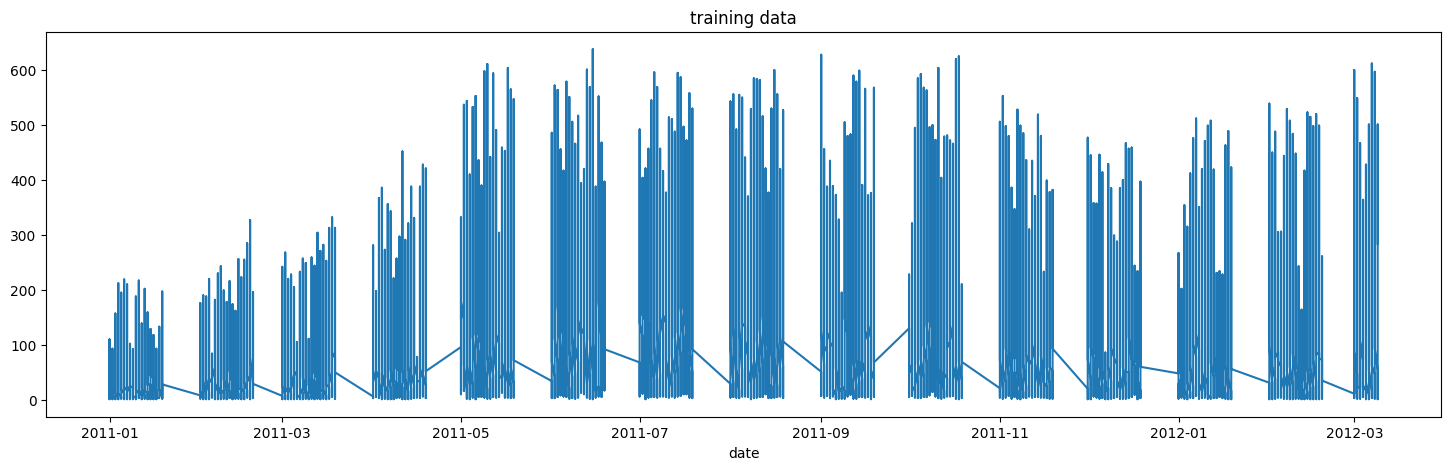

In [121]:
train_df['target'].plot(figsize=(18,5), title='training data')


(14975.0, 15033.0)

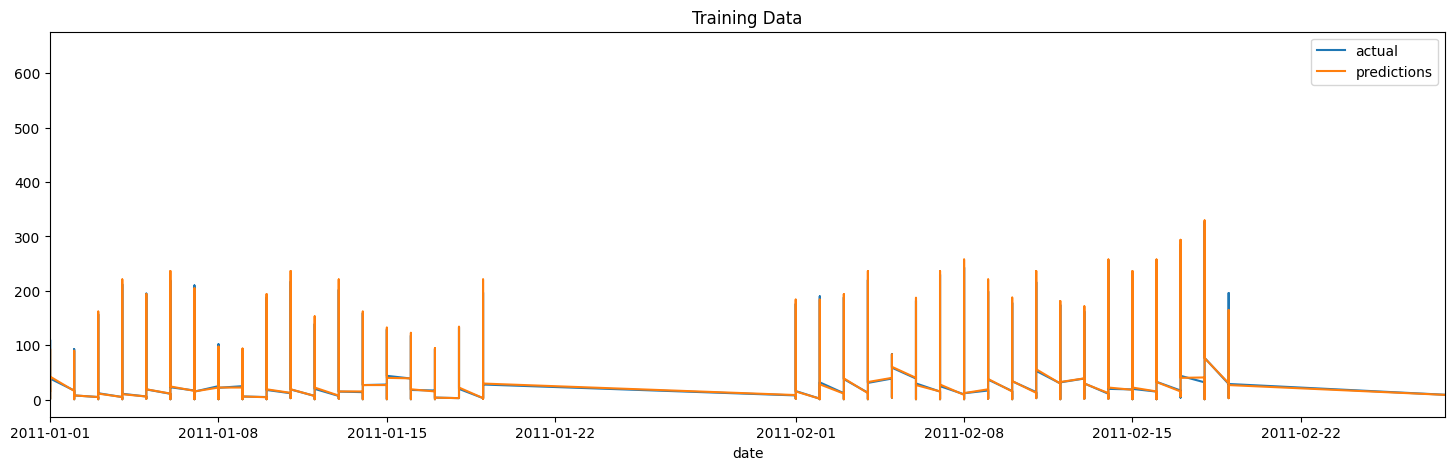

In [122]:
create_plot(train_df, tree, title='Training Data')
plt.xlim(pd.to_datetime('2011-01-01'), pd.to_datetime('2011-02-28'))

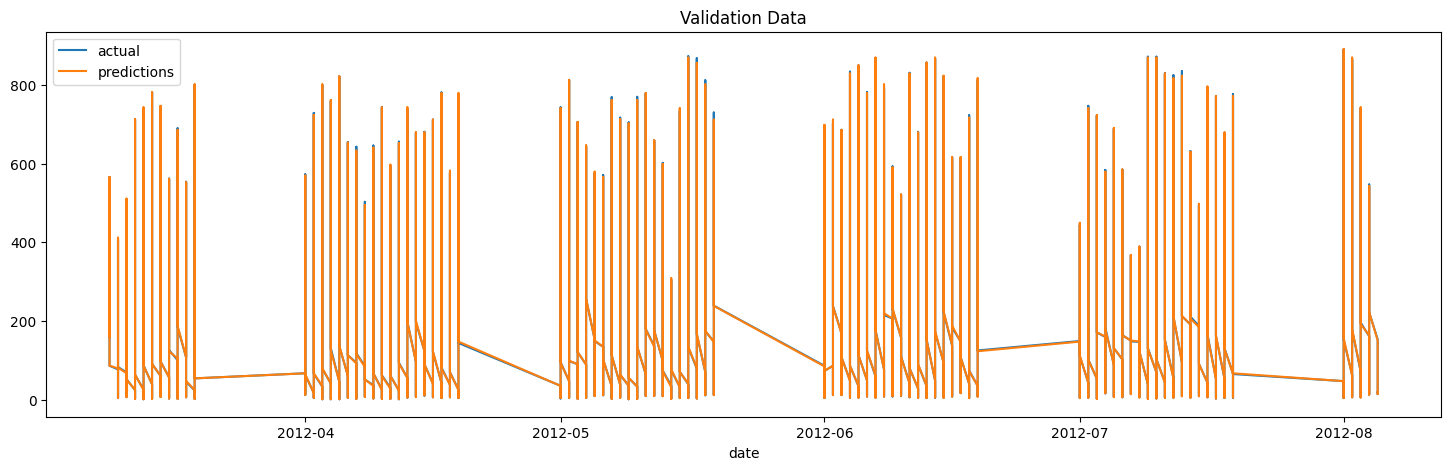

In [123]:
create_plot(val_df, tree, title='Validation Data')

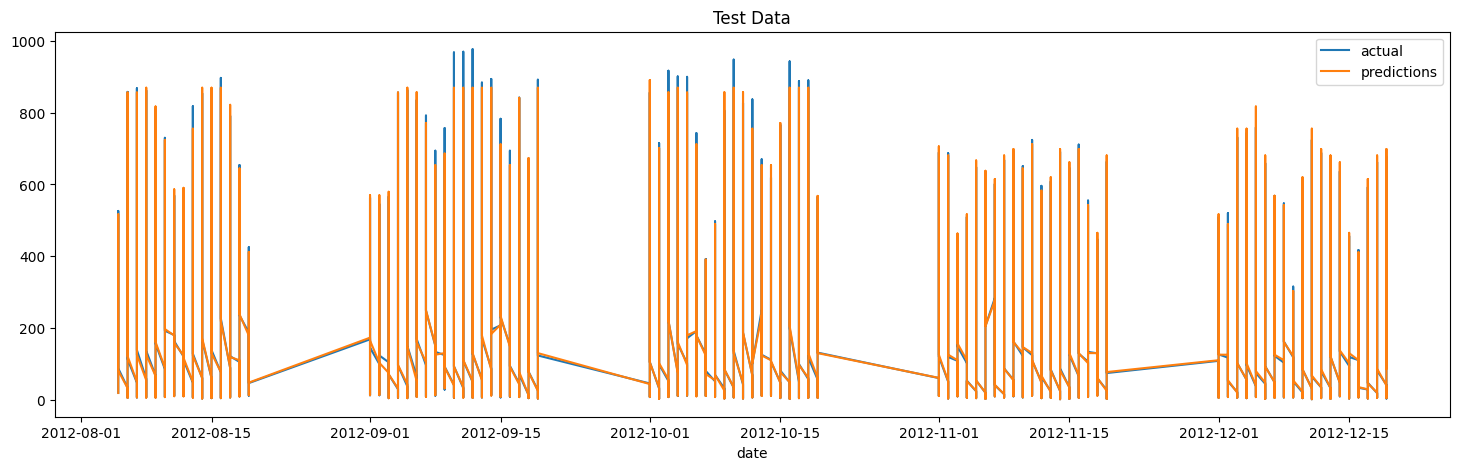

In [124]:
create_plot(test_df, tree, title='Test Data')

---
## Example WorkFlows:

### Classification

```Python
train_df, test_df = train_test_split(df, test_size=0.2, seed=13)
gs, best_tree = grid_search(train_df, val_df, target='target', ml_task='classification', max_depth_range=(2,11),min_samples_range=(5,30,5), metrics=['mae','mse'])
accuracy, precision, recall = classification_scores(test_df, estimator=best_tree, target=target)
```

### Regression

```Python
train_df, test_df = train_test_split(df, test_size=0.2, seed=13)
gs, best_tree = grid_search(train_df, val_df, target='target', ml_task='regression', max_depth_range=(2,11),min_samples_range=(5,30,5), metrics=['mae','mse'])
mae, mse, rmse, r2 = regression_metrics(test_df, estimator=best_tree, target=target)
```